**Nombres: Álvaro Castillo Monge, Juan Antonio Martos Navarro**

The goal of this set of lab assignments is the extraction of opinions about item aspects from text reviews;
specifically, positive and negative opinions about aspects of hotels existing in a collection of Yelp1
reviews.
The following are examples aspects that may be considered along with some terms that can be used to refer to
such aspects:
* Amenities: amenities, services, …
* Atmosphere: atmosphere, ambiance, …
* Bedrooms: room, bedroom, suite …
* Facilities: facilities, equipment, …
* Location: location, environment, neighborhood, …
* Pool: pool, swimming pool, …
* Restrooms: restrooms, toilets, …
* Shopping: shops, boutiques, stores, …
* Staff: staff, employees, receptionist, …


You are requested to perform the above tasks by means of a program in Python that uses the NLTK toolkit,
https://www.nltk.org, https://www.nltk.org/howto, http://www.nltk.org/nltk_data.
The final output of the program must be a summary of the opinions made about a particular hotel by users
from a given review dataset. You are free to decide the elements and representation of such summary, but at
least it should contain the number of positive and negative opinions associated to each aspect of the hotel.

### Assignment 1

**TASK 1.1**

In [1]:
import json

with open('yelp_dataset/yelp_hotels.json', encoding='utf-8') as f:
    hotels_reviews = json.load(f)
f.close()

numReviews = len(hotels_reviews)
print(numReviews, 'reviews loaded')
print(hotels_reviews[0])
print(hotels_reviews[0].get('reviewerID'))

5034 reviews loaded
{'reviewerID': 'qLCpuCWCyPb4G2vN-WZz-Q', 'asin': '8ZwO9VuLDWJOXmtAdc7LXQ', 'summary': 'summary', 'reviewText': "Great hotel in Central Phoenix for a stay-cation, but not necessarily a place to stay out of town and without a car. Not much around the area, and unless you're familiar with downtown, I would rather have a guest stay in Old Town Scottsdale, etc. BUT if you do stay here, it's awesome. Great boutique rooms. Awesome pool that's happening in the summer. A GREAT rooftop patio bar, and a very very busy lobby with Gallo Blanco attached. A great place to stay, but have a car!", 'overall': 4.0}
qLCpuCWCyPb4G2vN-WZz-Q


**TASK 1.2**

In [2]:
# Beauty/Spa Resorts
spas_reviews = []
f = open('yelp_dataset/yelp_beauty_spas.json', 'r', encoding='utf-8')
for line in f:
    if line != '[\n' and line != ']': # Skip first and last line
        spas_reviews.append(json.loads(line.replace('},', '}')))
        
f.close()

print(len(spas_reviews), 'reviews loaded')
print(spas_reviews[0])
print(spas_reviews[0].get('reviewerID'))

5579 reviews loaded
{'reviewerID': 'Xm8HXE1JHqscXe5BKf0GFQ', 'asin': 'WGNIYMeXPyoWav1APUq7jA', 'summary': 'summary', 'reviewText': "Good tattoo shop. Clean space, multiple artists to choose from and books of their work are available for you to look though and decide who's style most mirrors what you're looking for. I chose Jet to do a cover-up for me and he worked with me on the design and our ideas and communication flowed very well. He's a very personable guy, is friendly and keeps the conversation going while he's working on you, and he doesn't dick around (read: He starts to work and continues until the job is done). He's very professional and informative. Good customer service combines with talent at the craft.", 'overall': 4.0}
Xm8HXE1JHqscXe5BKf0GFQ


In [3]:
# Restaurants
restaurants_reviews = []
f = open('yelp_dataset/yelp_restaurants.json', 'r', encoding='utf-8')
for line in f:
    if line != '[\n' and line != ']':
        restaurants_reviews.append(json.loads(line.replace('},', '}')))
        
f.close()

print(len(restaurants_reviews), 'reviews loaded')
print(restaurants_reviews[0])
print(restaurants_reviews[0].get('reviewerID'))

158430 reviews loaded
{'reviewerID': 'rLtl8ZkDX5vH5nAx9C3q5Q', 'asin': '9yKzy9PApeiPPOUJEtnvkg', 'summary': 'summary', 'reviewText': 'My wife took me here on my birthday for breakfast and it was excellent. The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure. Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning. It looked like the place fills up pretty quickly so the earlier you get here the better.Do yourself a favor and get their Bloody Mary. It was phenomenal and simply the best I\'ve ever had. I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it. It was amazing.While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious. It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete. It was the best "toast" I\'ve ever had.Anyway, I can\'t wai

### Assignment 2

**TASK 2.1**

In [4]:
def get_aspects(url):
    aspects = {}

    f = open(url, 'r')
    for line in f:
        tokens = line.rstrip('\n').split(',')
        aspects.setdefault(tokens[0], [])
        aspects[tokens[0]].append(tokens[1]) # Save aspects_hotels as a dictionary with key=aspect, value=list of terms.
        
    f.close()

    return aspects

aspects_hotels = get_aspects('aspects/aspects_hotels.csv')
aspects_spas = get_aspects('aspects/aspects_spas.csv')
aspects_restaurants = get_aspects('aspects/aspects_restaurants.csv')

In [5]:
print('Términos Hoteles: {}'.format(len([terms for sublist in list(aspects_hotels.values()) for terms in sublist])))
print('Términos Spas: {}'.format(len([terms for sublist in list(aspects_spas.values()) for terms in sublist])))
print('Términos Restaurantes: {}'.format(len([terms for sublist in list(aspects_restaurants.values()) for terms in sublist])))

Términos Hoteles: 282
Términos Spas: 333
Términos Restaurantes: 344


**TASK 2.2 & TASK 2.3**

In [6]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Juan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
from nltk.corpus import wordnet as wn

def expand_vocabulary(aspect):
    expand_list = []
    synsets = wn.synsets(aspect)

    # We always take the first definition because it is the most likely.
    if synsets:
        expand_list.append(synsets[0].lemma_names()) # Get synonyms.

        for h in synsets[0].hyponyms():
            expand_list.append(h.lemma_names()) # Get hyponyms too.
    
        for h in synsets[0].hypernyms():
            expand_list.append(h.lemma_names()) # Get hypernyms too.

    return [element for sublist in expand_list for element in sublist] # return flattened list.

# Hoteles
for key in aspects_hotels.keys():
    aspects_hotels[key] += expand_vocabulary(key) # We expand the list of terms for each aspect.

# Spas
for key in aspects_spas.keys():
    aspects_spas[key] += expand_vocabulary(key)

# Restaurantes
for key in aspects_restaurants.keys():
    aspects_restaurants[key] += expand_vocabulary(key)

In [8]:
print('Términos Hoteles (post-expanding): {}'.format(len([terms for sublist in list(aspects_hotels.values()) for terms in sublist])))
print('Términos Spas (post-expanding): {}'.format(len([terms for sublist in list(aspects_spas.values()) for terms in sublist])))
print('Términos Restaurantes (post-expanding): {}'.format(len([terms for sublist in list(aspects_restaurants.values()) for terms in sublist])))

Términos Hoteles (post-expanding): 808
Términos Spas (post-expanding): 1018
Términos Restaurantes (post-expanding): 1267


### Assignment 3

**TASK 3.1**

In [9]:
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\Juan\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [10]:
from nltk.corpus import opinion_lexicon

negativeWords = opinion_lexicon.negative()
positiveWords = opinion_lexicon.positive()
print(negativeWords)
print(len(negativeWords))
print(positiveWords)
print(len(positiveWords))

['2-faced', '2-faces', 'abnormal', 'abolish', ...]
4783
['a+', 'abound', 'abounds', 'abundance', 'abundant', ...]
2006


**TASK 3.2**

In [11]:
modifiers = {}
f = open('modifiers/modifiers.csv', 'r')
for line in f:
    tokens = line.rstrip('\n').split(',')
    modifiers.setdefault(tokens[0], [])
    modifiers[tokens[0]].append(tokens[1]) # Save modifiers in dictionary with key=word, value=weigth.
f.close()

### Assignment 4

**TASK 4.1**

In [12]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Juan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Juan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [13]:
def pos_tagging(text):
    sentences = nltk.sent_tokenize(text)
    sentences = [nltk.word_tokenize(s) for s in sentences]
    sentences = [nltk.pos_tag(s) for s in sentences]
    return sentences

postagged_sentences = pos_tagging(hotels_reviews[0].get("reviewText"))
print(postagged_sentences[0])

[('Great', 'JJ'), ('hotel', 'NN'), ('in', 'IN'), ('Central', 'NNP'), ('Phoenix', 'NNP'), ('for', 'IN'), ('a', 'DT'), ('stay-cation', 'NN'), (',', ','), ('but', 'CC'), ('not', 'RB'), ('necessarily', 'RB'), ('a', 'DT'), ('place', 'NN'), ('to', 'TO'), ('stay', 'VB'), ('out', 'IN'), ('of', 'IN'), ('town', 'NN'), ('and', 'CC'), ('without', 'IN'), ('a', 'DT'), ('car', 'NN'), ('.', '.')]


Para la extracción de las tuplas de las reviews se ha utilizado POS tagging en conjunto con chunking. Se ha modificado el grammar del ejemplo proporcionado en el apéndice C para tener en cuenta otras posibles estructuras. En concreto, se han añadido expresiones regulares para tener en cuenta un posible adverbio que preceda al chunk de adjetivo y nombre (ej: “very good service”), y estructuras del tipo sustantivo + verbo + adverbio + adjetivo (ej: “staff was very friendly”). Para la asignación de la polaridad se ha seguido el siguiente procedimiento:

* Se comprueba si el nombre aparece en la lista de términos de algún aspecto.
* Se compruebo si el adjetivo aparece en la lista de positiveWords o negativeWords, si el adjetivo aparece en alguna de las listas se le asigna polaridad +0,5 o -0,5 respectivamente.
* Por último, si hay un adverbio previo al adjetivo se comprueba en la lista de modificadores el peso asociado a dicho adverbio y se multiplica la polaridad por este peso.

De este modo, terminaremos con un valor de polaridad en el intervalo [-1, 1], dependiendo de si la opinión es positiva o negativa y de la intensidad de esta.

In [14]:
import pandas as pd
from tqdm import tqdm

grammar = r"""
 JJNN: {<RB>?<JJ><NN.*>+} # chunk adverb, adjective and sequences noun
       {<NN.*>+<VB.*><JJ>} # chunk sequences noun, verb and adjective 
       {<NN.*>+<VB.*><RB><JJ>} # chunk sequences noun, verb, adverb and adjective
  
"""
cp = nltk.RegexpParser(grammar)

def check_polarity(child, aspects):
    # Initialize default values.
    aspect = ''
    aspect_term = ''
    opinion_word = ''
    modifier = '' 
    multiplier = 1
    polarity = 0

    for i in range(len(child)):
        # Check if there´s a modifier that changes the polarity.
        if child[i][1] == 'RB' and child[i][0].lower() in modifiers.keys():
            modifier = child[i][0] # Save modifier.
            multiplier = float(modifiers[modifier.lower()][0]) # Get weigth of modifier.
    
        elif child[i][1] == 'JJ': 
            opinion_word = child[i][0] # Save adjective.
            # Check if adjective is in positiveWords or negativeWords to assign polarity.
            if opinion_word.lower() in positiveWords: polarity = 0.5 
            elif opinion_word.lower() in negativeWords: polarity = -0.5
    
        elif child[i][1].startswith('NN'):      
            for key, terms in aspects.items(): # Iterate through 'aspect': [terms] dictionary.
                if child[i][0].lower() in terms: # Check if noun is in terms list.
                    aspect = key # Save aspect.
                    aspect_term = child[i][0] # Save aspect term.
                    continue         
           

    return {'Aspect': aspect, 'Aspect Term': aspect_term, 'Opinion Word': opinion_word, 'Modifier': modifier, 'Polarity': polarity * multiplier} if aspect and polarity else None

def reviews_polarity(reviews, aspects):
    results = []

    for idx, review in (enumerate(tqdm(reviews, desc='Progress...'))):
        # Get all tagged sentences of a review
        tagged_senteces = [pos_tagging(review.get('reviewText'))[:]]
        lista_tuplas = []
        for sentence in tagged_senteces[0]:
            chunk_parse = cp.parse(sentence) # Chunking of each sentence.
            for child in chunk_parse:
                if isinstance(child, nltk.Tree):
                    if child.label() == 'JJNN':
                        tupla = check_polarity(child, aspects) # Check polarity of JJNN childs.
                        if tupla: lista_tuplas.append(tupla)

        results.append(lista_tuplas) # List of tuples for each review.
  
    df = pd.DataFrame(reviews).copy()
    df['Tuplas'] = results # Add column with list of tuples to dataframe.
    return df

In [15]:
df_hotels = reviews_polarity(hotels_reviews, aspects_hotels)

Progress...: 100%|█████████████████████████████████████████████████████████████████| 5034/5034 [09:06<00:00,  9.21it/s]


In [16]:
df_spas = reviews_polarity(spas_reviews, aspects_spas)

Progress...: 100%|█████████████████████████████████████████████████████████████████| 5579/5579 [07:57<00:00, 11.67it/s]


### Assignment 5

**TASK 5.1**

In [17]:
def show_review_tuples(df, review):
    print(review + '\n')
    # Then we search in the dataframe given the reviewText that matches the review given and print
    # the list of dictionaries (Tuplas) with dataframe format.
    display(pd.DataFrame(df[df['reviewText'] == review]['Tuplas'].tolist()[0]))


In [18]:
show_review_tuples(df_hotels, hotels_reviews[100].get('reviewText'))

We got in late and had an early departure the next day. The staff was very friendly and helpful. Our room was spacious and the bed was very comfy. The amenities were decent, however there was no shower cap or q-tips. There was Wi-Fi, but it wasn't the best.The outside was beautiful, being surrounded by green always makes the desert better.I didn't get the chance to use the swimming pool. I would definitely recommend this hotel. Next time, I will make time to be able to use the swimming pool.



,Aspect,Aspect Term,Opinion Word,Modifier,Polarity
0,staff,staff,friendly,very,1.0
1,parking,room,spacious,,0.5
2,bedrooms,bed,comfy,very,1.0
3,amenities,amenities,decent,,0.5


In [19]:
show_review_tuples(df_spas, spas_reviews[200].get('reviewText'))

This salon is really cute. Fridays are 1/2 off single sessions and this is why I keep coming back. I use the level 2 bed and on Fridays its only $5 to tan. I wouldn't come here if they didn't have that though because membership prices are ridiculous and the customer service isn't that great.



,Aspect,Aspect Term,Opinion Word,Modifier,Polarity
0,building,salon,cute,really,1.0
1,price,prices,ridiculous,,-0.5


**TASK 5.2**

In [20]:
def aspect_polarity(df, aspect, print_results=False):
    # Initialize number of positive and negative opinions.
    positive = 0
    negative = 0

    for asp, polar in zip([tupla['Aspect'] for tuplas in df['Tuplas'] for tupla in tuplas], [tupla['Polarity'] for tuplas in df['Tuplas'] for tupla in tuplas]):
        if asp == aspect:
            if polar > 0:  positive += 1 # If polarity is greater than 0 then it is a positive opinion.
            elif polar < 0:  negative += 1 # If polarity is less than 0 then it is a negative opinion.
  
    if print_results:  print('Aspect: {}\n Positives: {}\t Negatives: {}'.format(aspect, positive, negative))
  
    return positive, negative

In [21]:
_ = aspect_polarity(df_hotels, 'staff', print_results=True)

Aspect: staff
 Positives: 861	 Negatives: 51


In [22]:
_ = aspect_polarity(df_spas, 'price', print_results=True)

Aspect: price
 Positives: 422	 Negatives: 31


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_opinions(df, aspects):
    # Initialize arrays with size = number of aspects.
    positives = np.zeros(len(aspects.keys()))
    negatives = np.zeros(len(aspects.keys()))
    
    # Get number of positive and negative opinions for each aspect.
    for idx, aspect in enumerate(aspects.keys()): 
        positives[idx], negatives[idx] = aspect_polarity(df, aspect)

    df_results = pd.DataFrame({'Aspects': aspects.keys(), 'Positives': positives, 'Negatives': negatives})
    
    # Plot Results.
    plt.figure(figsize=(10, 7))
    sns.barplot(y='Aspects', x='Positives', data=df_results.sort_values(by='Positives', ascending=False), color='blue', orient='h', label='Positive Opinions', alpha=1)
    sns.barplot(y='Aspects', x='Negatives', data=df_results.sort_values(by='Positives', ascending=False), color='red', orient='h', label='Negative Opinions', alpha=0.75)
    plt.xlabel('Opinions')
    plt.legend(loc='best')
    plt.title('Aspect Opinions')
    plt.tight_layout()
    plt.show()

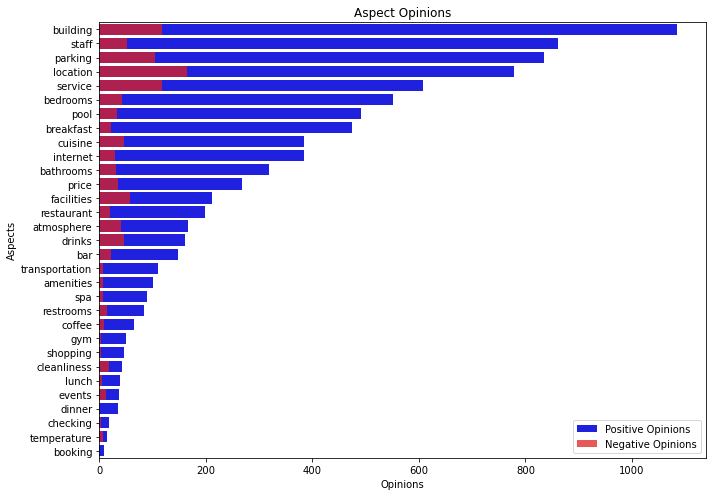

In [24]:
plot_opinions(df_hotels, aspects_hotels)

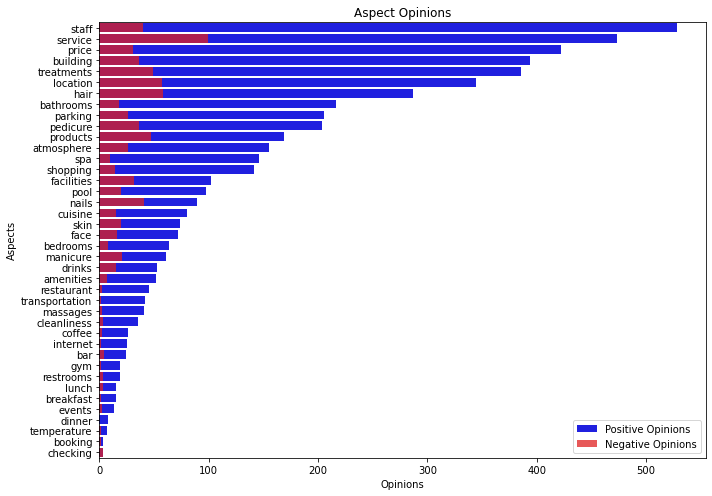

In [25]:
plot_opinions(df_spas, aspects_spas)